In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity
from scipy import signal

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from data_prep import DataPrep
from data_plotting import DataPlotting

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



# <ins>Loading and processing data</ins>

In [2]:
file_path = './data/v2_CLD/AE_3C_1D/200716-174206_174209_174205'
data_prep = DataPrep(file_path)
data = data_prep.load_data(2, 'timestamp', True)

Data  1  : 
./data/v2_CLD/AE_3C_1D/200716-174206_174209_174205\c.txt loaded.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792477 entries, 2020-07-16 08:42:07.312000 to 2020-07-16 09:06:12.722000
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   mag_x        792477 non-null  float64
 1   mag_y        792477 non-null  float64
 2   mag_z        792477 non-null  float64
 3   mag_acc      792477 non-null  int64  
 4   acc_x        792477 non-null  float64
 5   acc_y        792477 non-null  float64
 6   acc_z        792477 non-null  float64
 7   acc_acc      792477 non-null  int64  
 8   gyro_x       792477 non-null  float64
 9   gyro_y       792477 non-null  float64
 10  gyro_z       792477 non-null  float64
 11  gyro_acc     792477 non-null  int64  
 12  pos_lat      792477 non-null  float64
 13  pos_lng      792477 non-null  float64
 14  pos_acc      792477 non-null  float64
 15  activity     792477 non-null

In [3]:
data = data_prep.total_intensity()

In [4]:
data = data_prep.downsampling('250ms')

In [5]:
data = data_prep.normalise(1)

## Visualizing total intensity

In [6]:
data_plotting = DataPlotting()

dir_name = 'AE_3C_1D'
file_name = '200716-174206_174209_174205'

Data 1 : 
Start :
 2020-07-16 08:42:14
End :
 2020-07-16 09:06:11.750000
Time delta :
 0 days 00:23:57.750000
Shape :
 (5752, 1) 

Data 2 : 
Start :
 2020-07-16 08:42:14
End :
 2020-07-16 09:06:11.750000
Time delta :
 0 days 00:23:57.750000
Shape :
 (5752, 1) 

Data 3 : 
Start :
 2020-07-16 08:42:14
End :
 2020-07-16 09:06:11.750000
Time delta :
 0 days 00:23:57.750000
Shape :
 (5752, 1) 



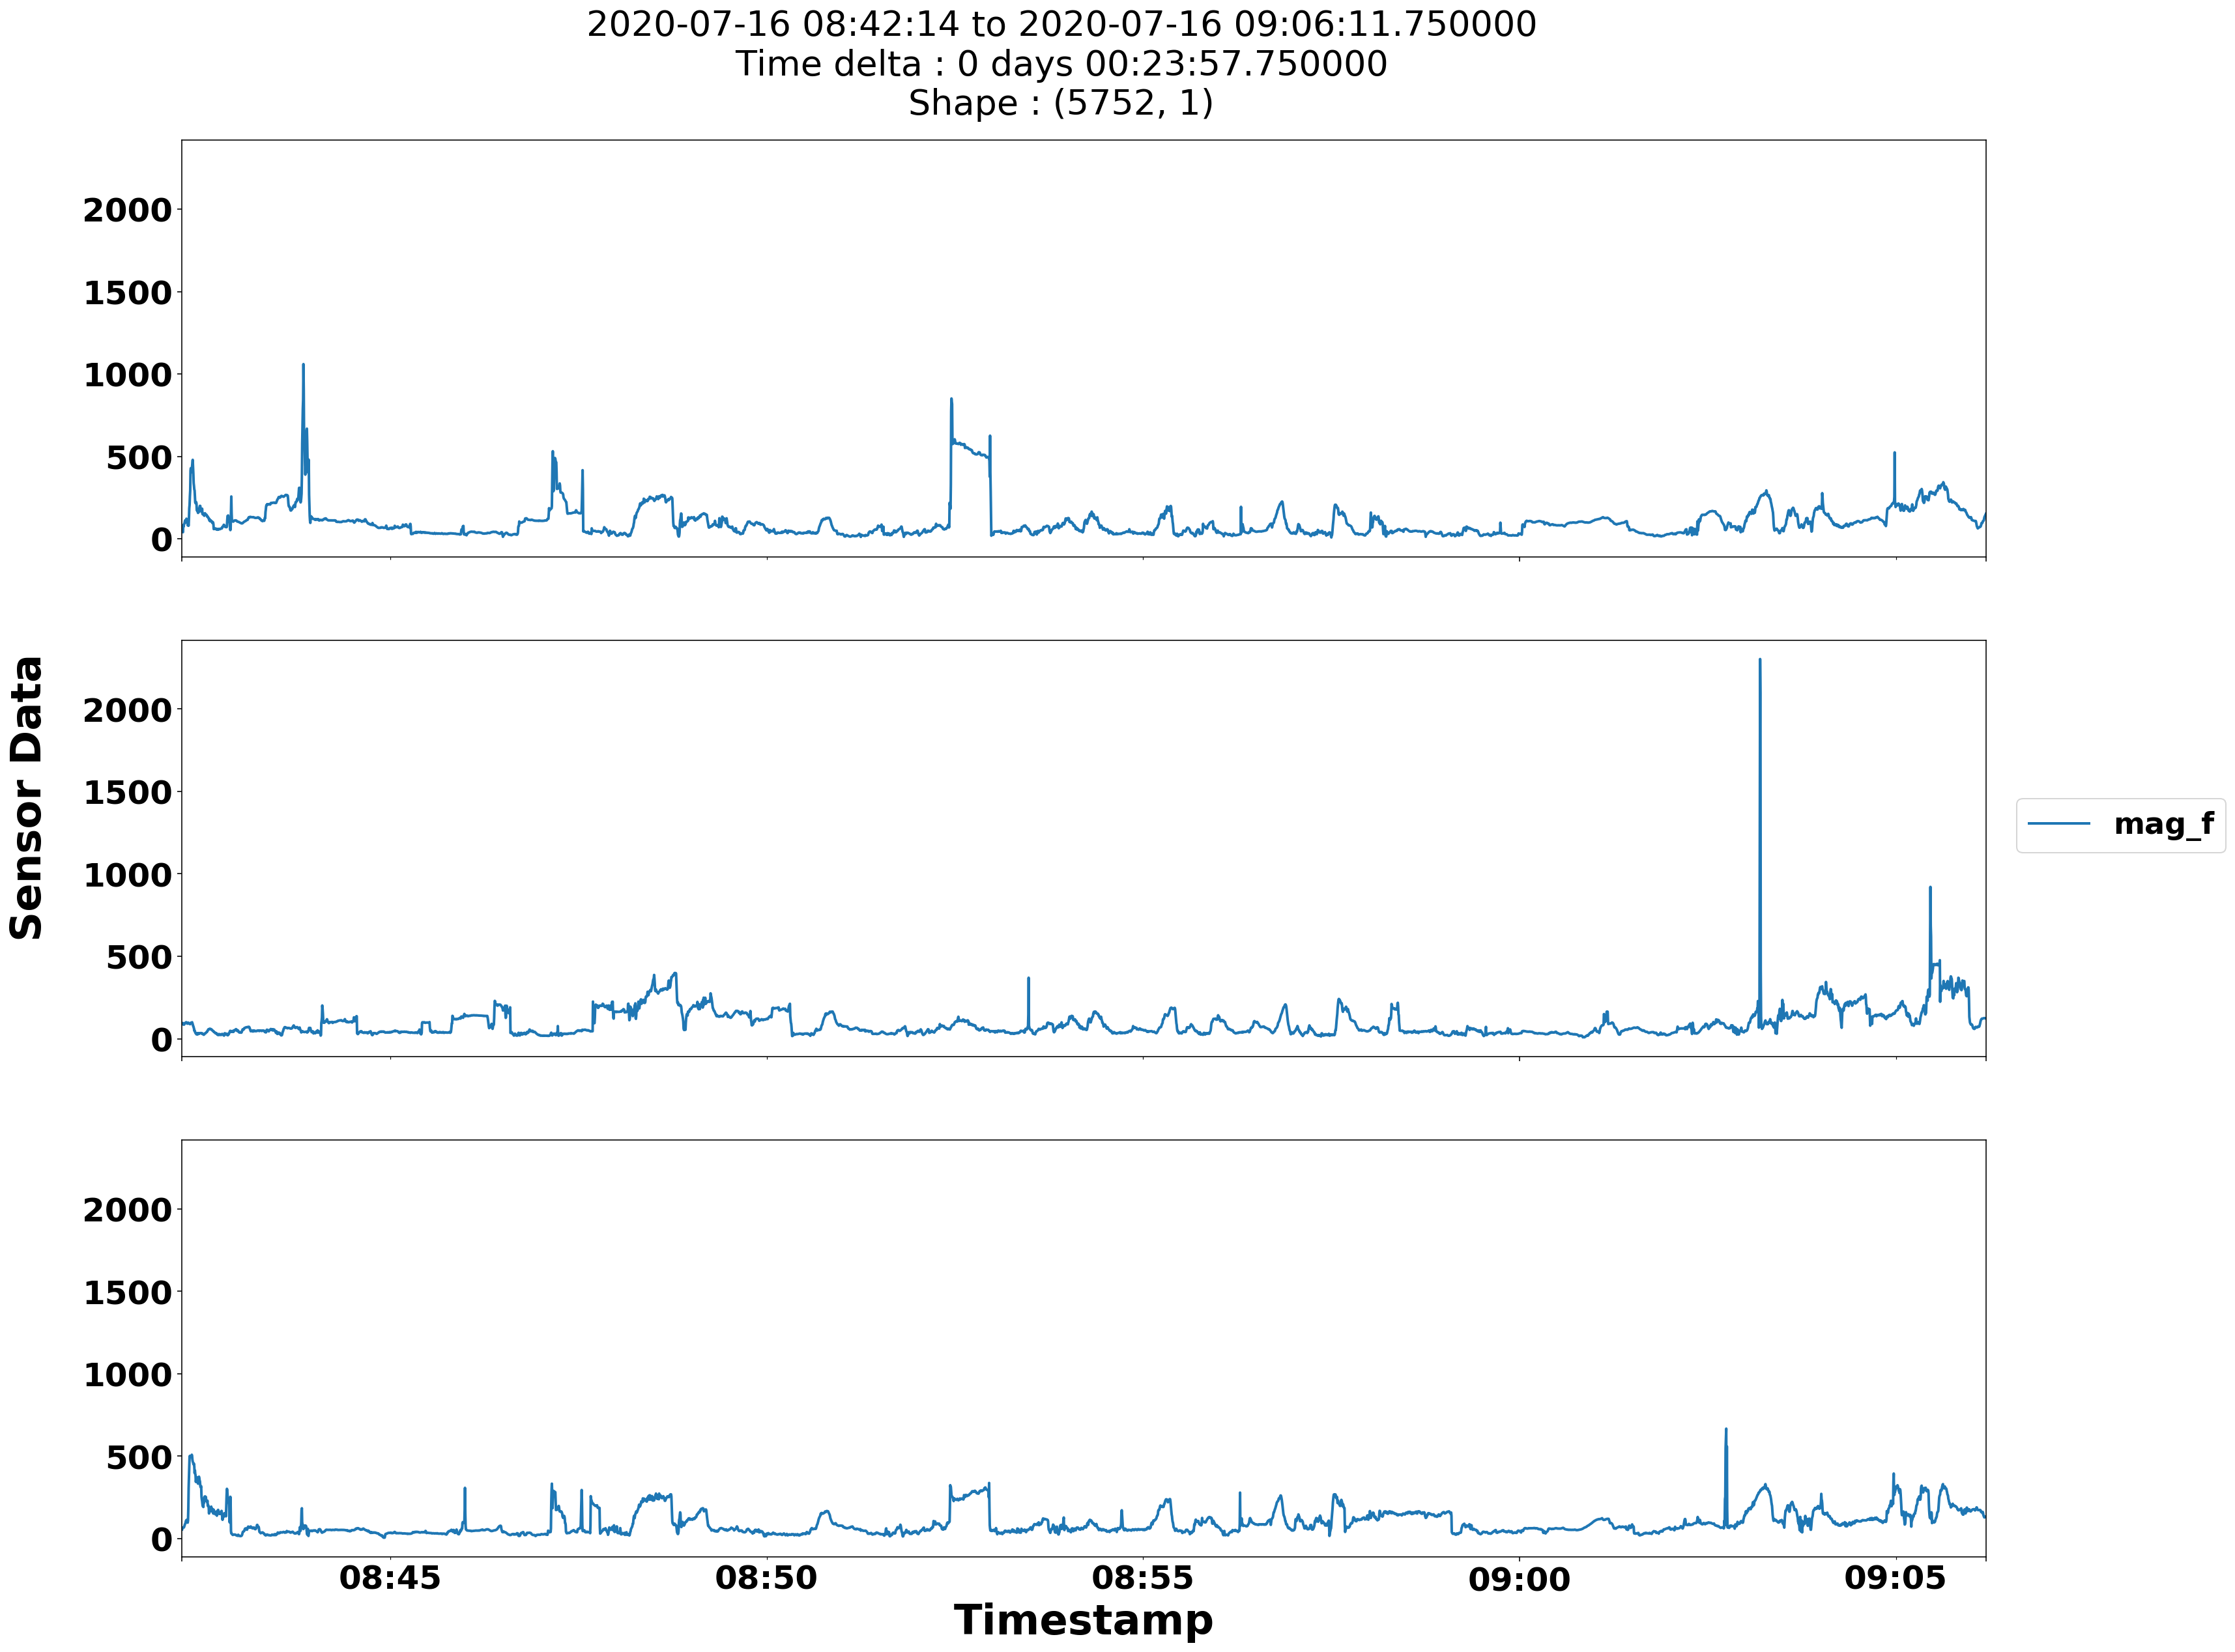

In [7]:
data_display = ['mag_f']
time_from = "2020-07-16 08:42:14"
time_to = "2020-07-16 09:06:11"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20),
                             dir_name, '(pp)' + file_name + '_st_1ti(ds)', False)

# <ins>Short-time Fourier Transform</ins>
Docs : https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html

In [8]:
def stft(data):
    fs = 1.0
    f, t, Zxx = signal.stft(data, fs, nperseg=32)
    return f, t, Zxx

In [9]:
def stft_plot(data, f, t, Zxx):
    font = {'family': 'DejaVu Sans',
                'weight': 'normal',
                'size': 15}
    plt.rc('font', **font)
    
    amp = 2 * np.sqrt(2)
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

    print("Data size : ", data.shape)
    
#     print("f : ", f)
#     print("t : ", t)
    print("Zxx size : ", Zxx.shape)

## 24 minutes data 

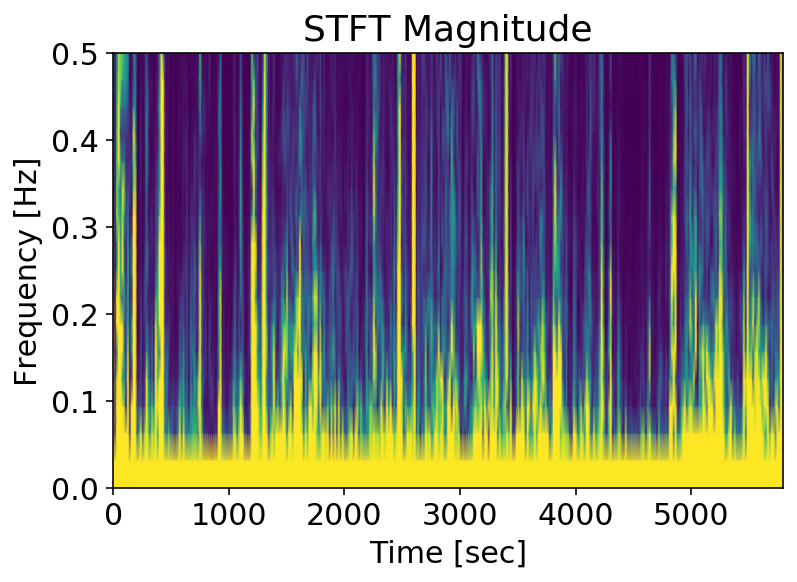

Data size :  (5782,)
Zxx size :  (17, 363)


In [10]:
f, t, Zxx = stft(data[0]['mag_f'])
stft_plot(data[0]['mag_f'], f, t, Zxx)

f, t, Zxx = stft(data[0]['mag_f'])
stft_plot(data[0]['mag_f'], f, t, Zxx)

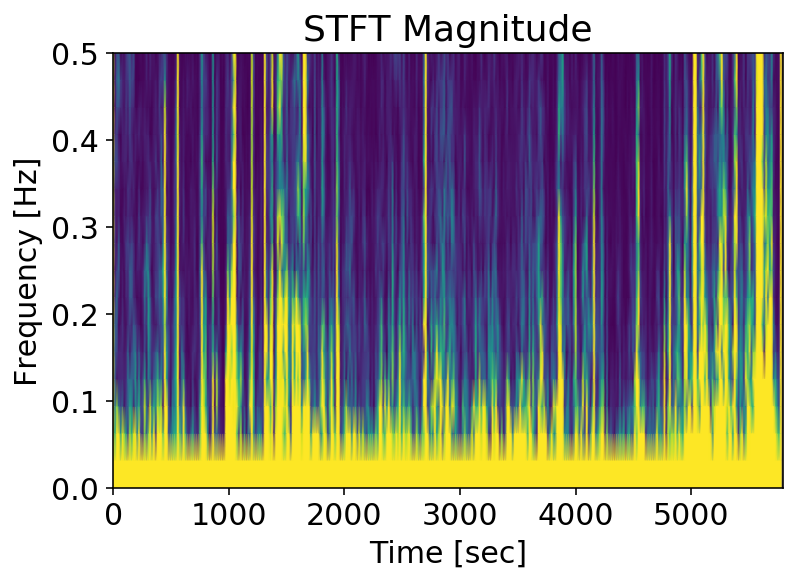

Data size :  (5779,)
Zxx size :  (17, 363)


In [11]:
f, t, Zxx = stft(data[1]['mag_f'])
stft_plot(data[1]['mag_f'], f, t, Zxx)

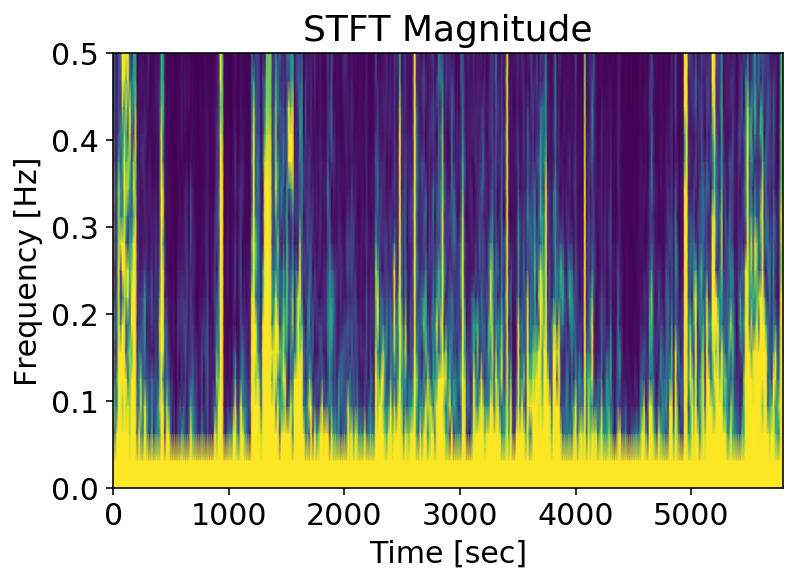

Data size :  (5785,)
Zxx size :  (17, 363)


In [12]:
f, t, Zxx = stft(data[2]['mag_f'])
stft_plot(data[2]['mag_f'], f, t, Zxx)

## 5 minutes data

#### 08:45-08:50

In [13]:
data_display = ['mag_f']
time_from = "2020-07-16 08:45:00"
time_to = "2020-07-16 08:50:00"

Data 1 : 
Start :
 2020-07-16 08:45:00
End :
 2020-07-16 08:50:00.750000
Time delta :
 0 days 00:05:00.750000
Shape :
 (1204, 1) 

Data 2 : 
Start :
 2020-07-16 08:45:00
End :
 2020-07-16 08:50:00.750000
Time delta :
 0 days 00:05:00.750000
Shape :
 (1204, 1) 

Data 3 : 
Start :
 2020-07-16 08:45:00
End :
 2020-07-16 08:50:00.750000
Time delta :
 0 days 00:05:00.750000
Shape :
 (1204, 1) 



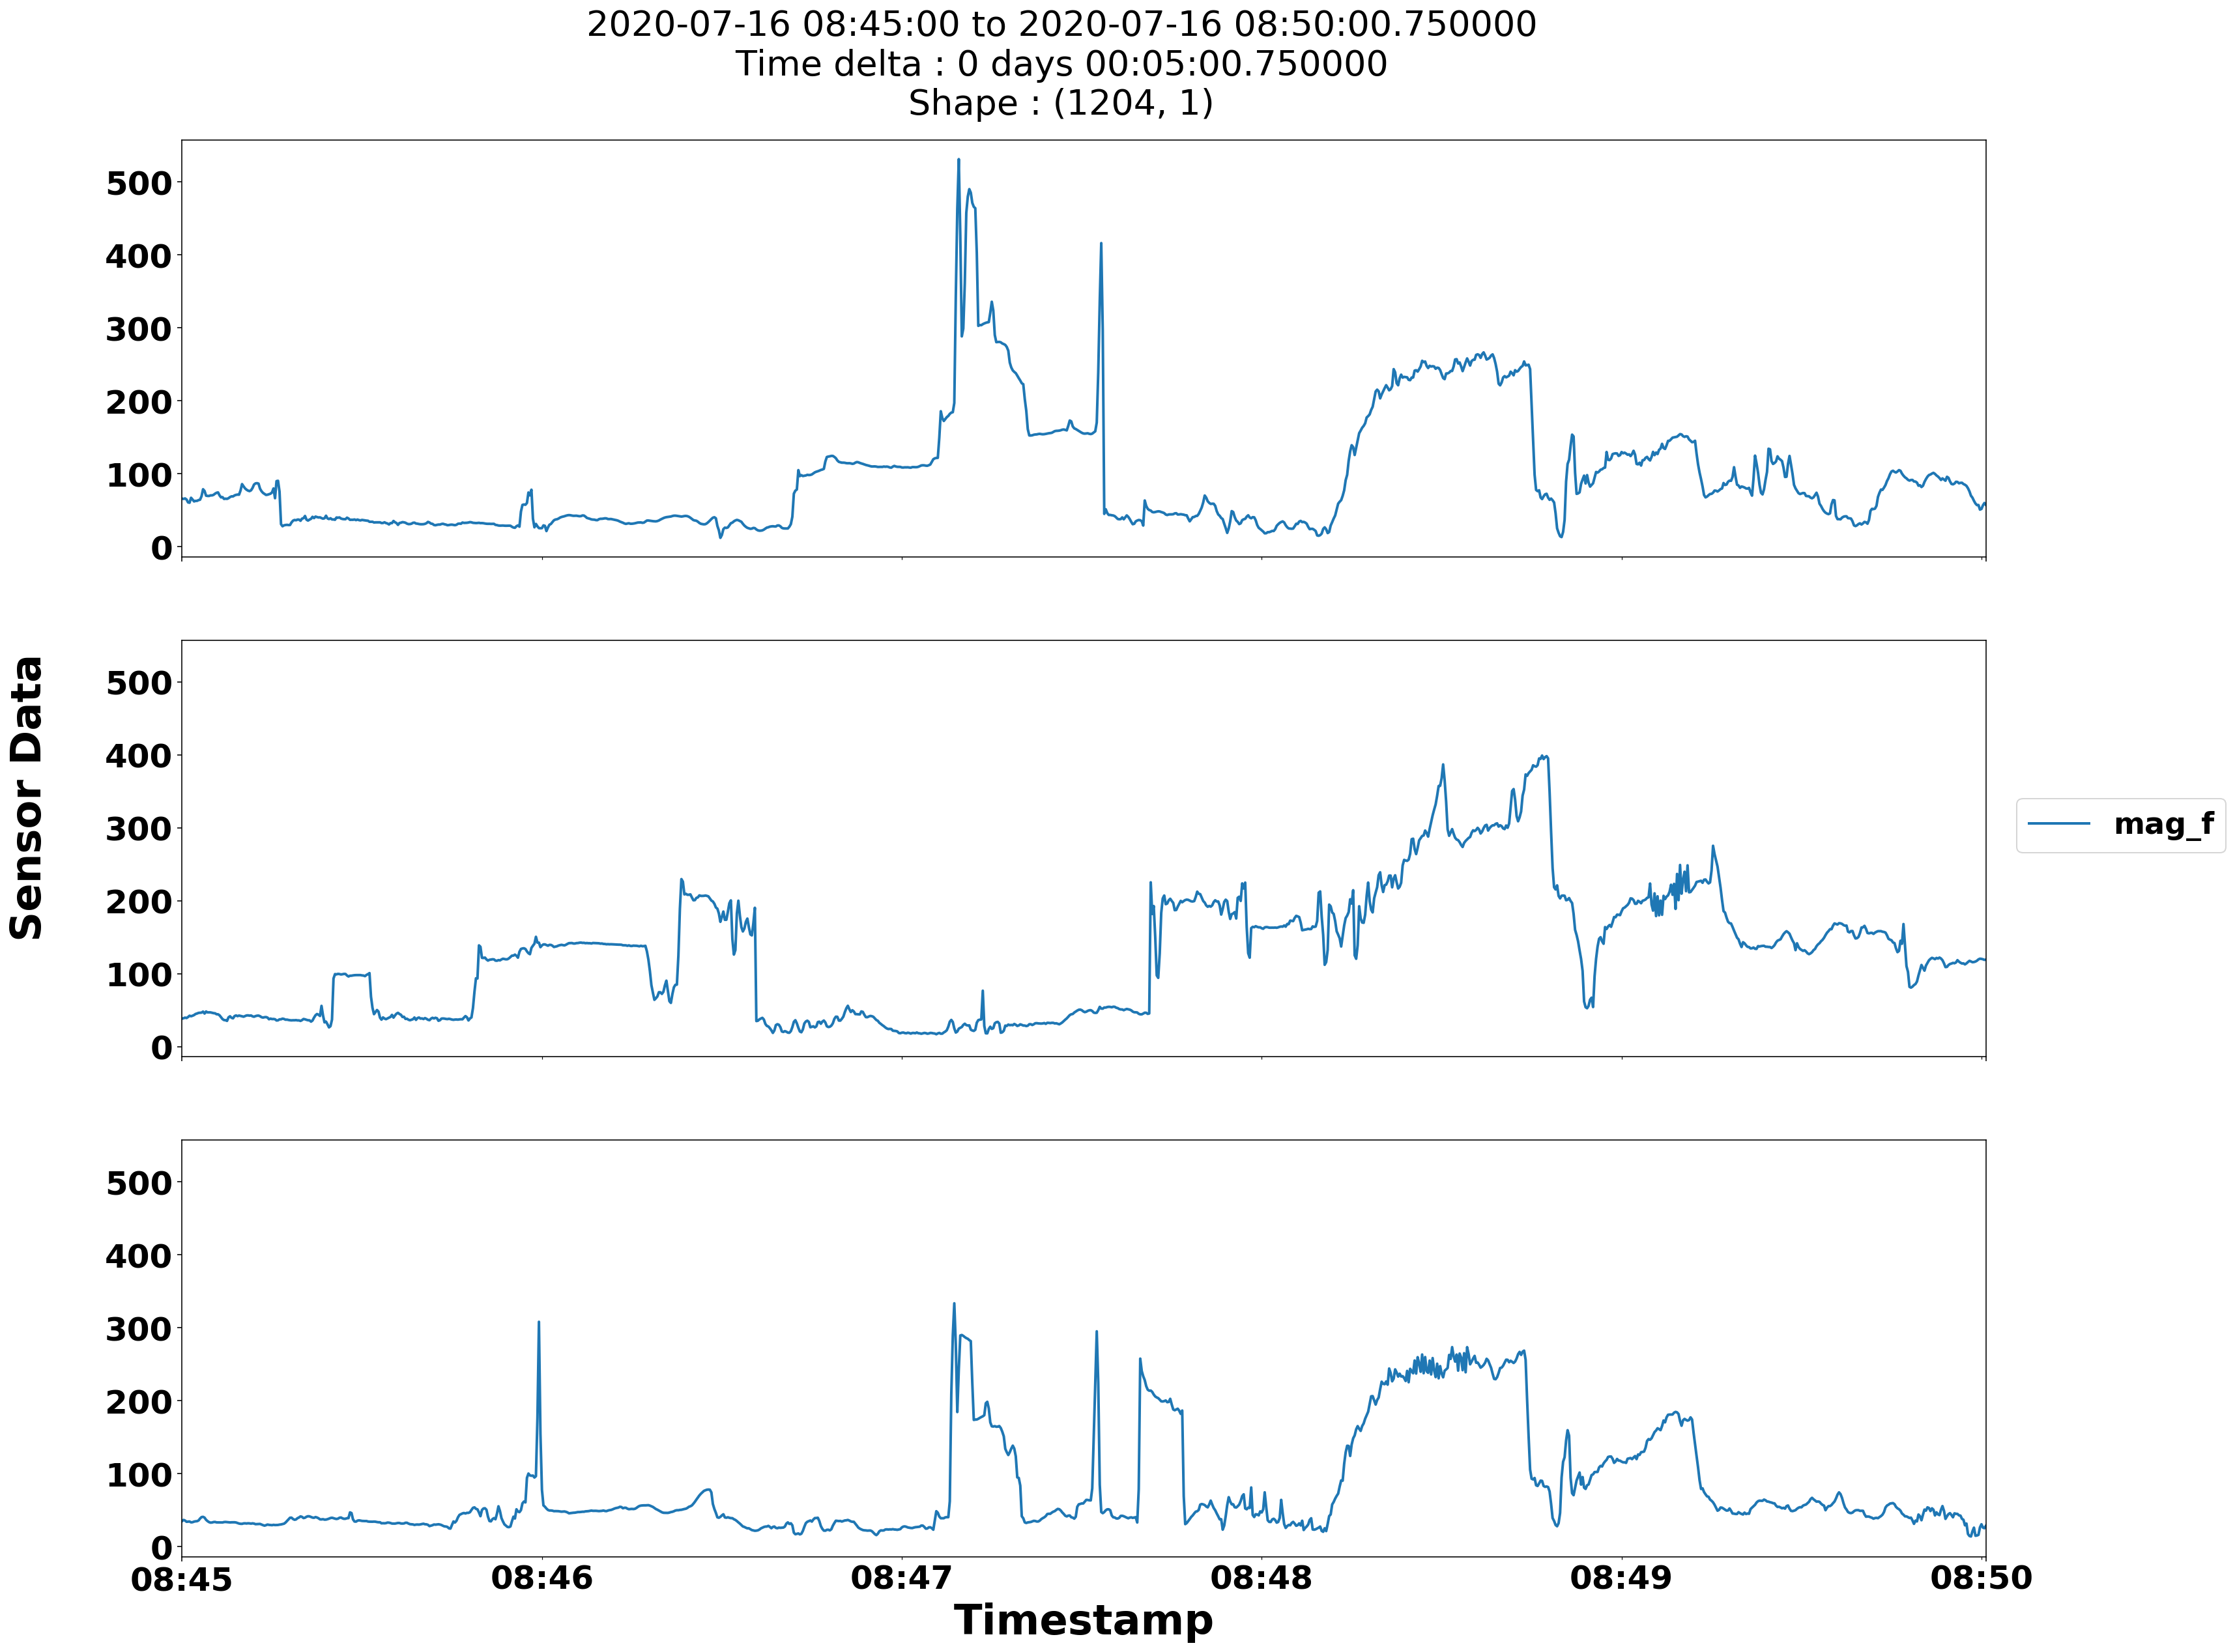

In [14]:
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20),
                             dir_name, '(stft)' + file_name + '_st_1ti1(ds)', False)

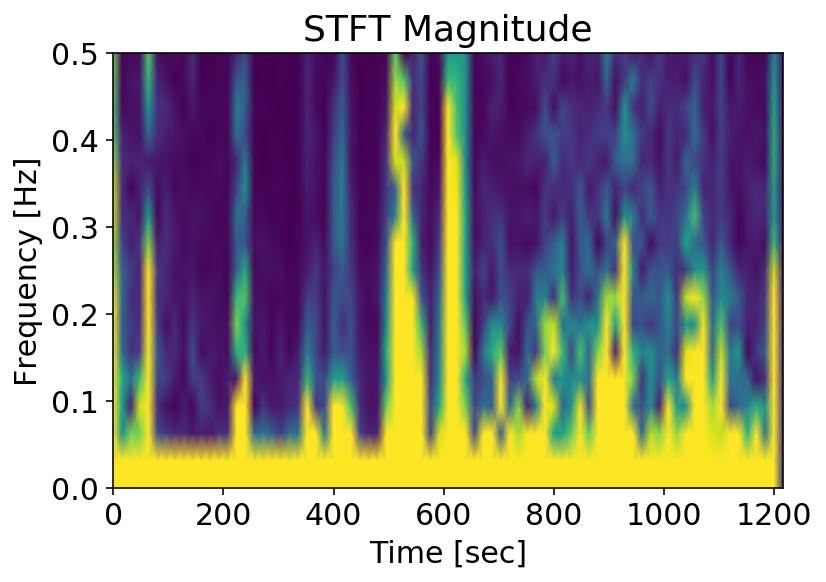

Data size :  (5782,)
Zxx size :  (17, 77)


In [15]:
f, t, Zxx = stft(data[0][time_from:time_to]['mag_f'])
stft_plot(data[0]['mag_f'], f, t, Zxx)

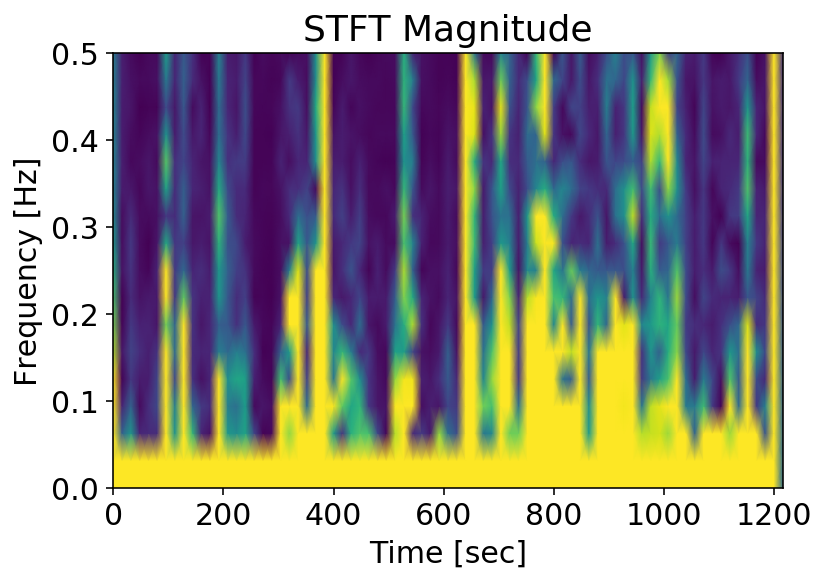

Data size :  (5779,)
Zxx size :  (17, 77)


In [16]:
f, t, Zxx = stft(data[1][time_from:time_to]['mag_f'])
stft_plot(data[1]['mag_f'], f, t, Zxx)

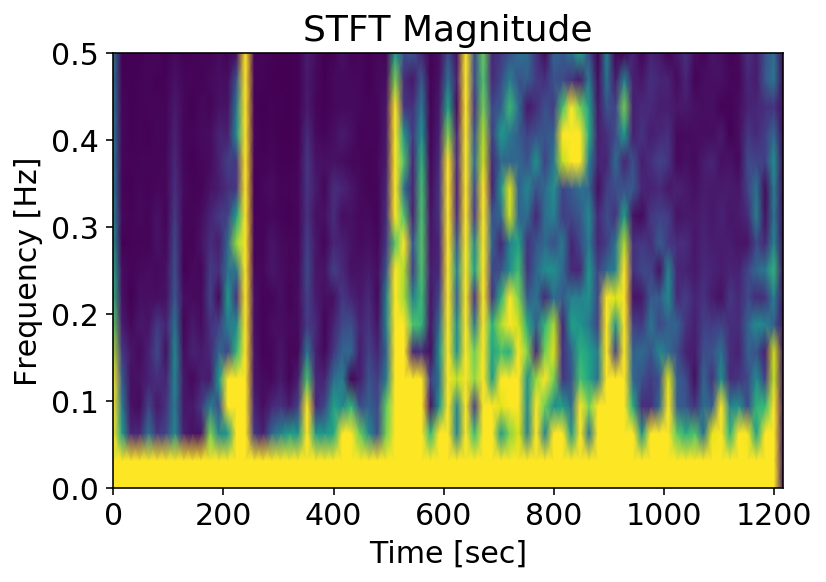

Data size :  (5785,)
Zxx size :  (17, 77)


In [17]:
f, t, Zxx = stft(data[2][time_from:time_to]['mag_f'])
stft_plot(data[2]['mag_f'], f, t, Zxx)

#### 08:50-08:55

In [18]:
data_display = ['mag_f']
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:55:00"

Data 1 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:55:00.750000
Time delta :
 0 days 00:05:00.750000
Shape :
 (1204, 1) 

Data 2 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:55:00.750000
Time delta :
 0 days 00:05:00.750000
Shape :
 (1204, 1) 

Data 3 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:55:00.750000
Time delta :
 0 days 00:05:00.750000
Shape :
 (1204, 1) 



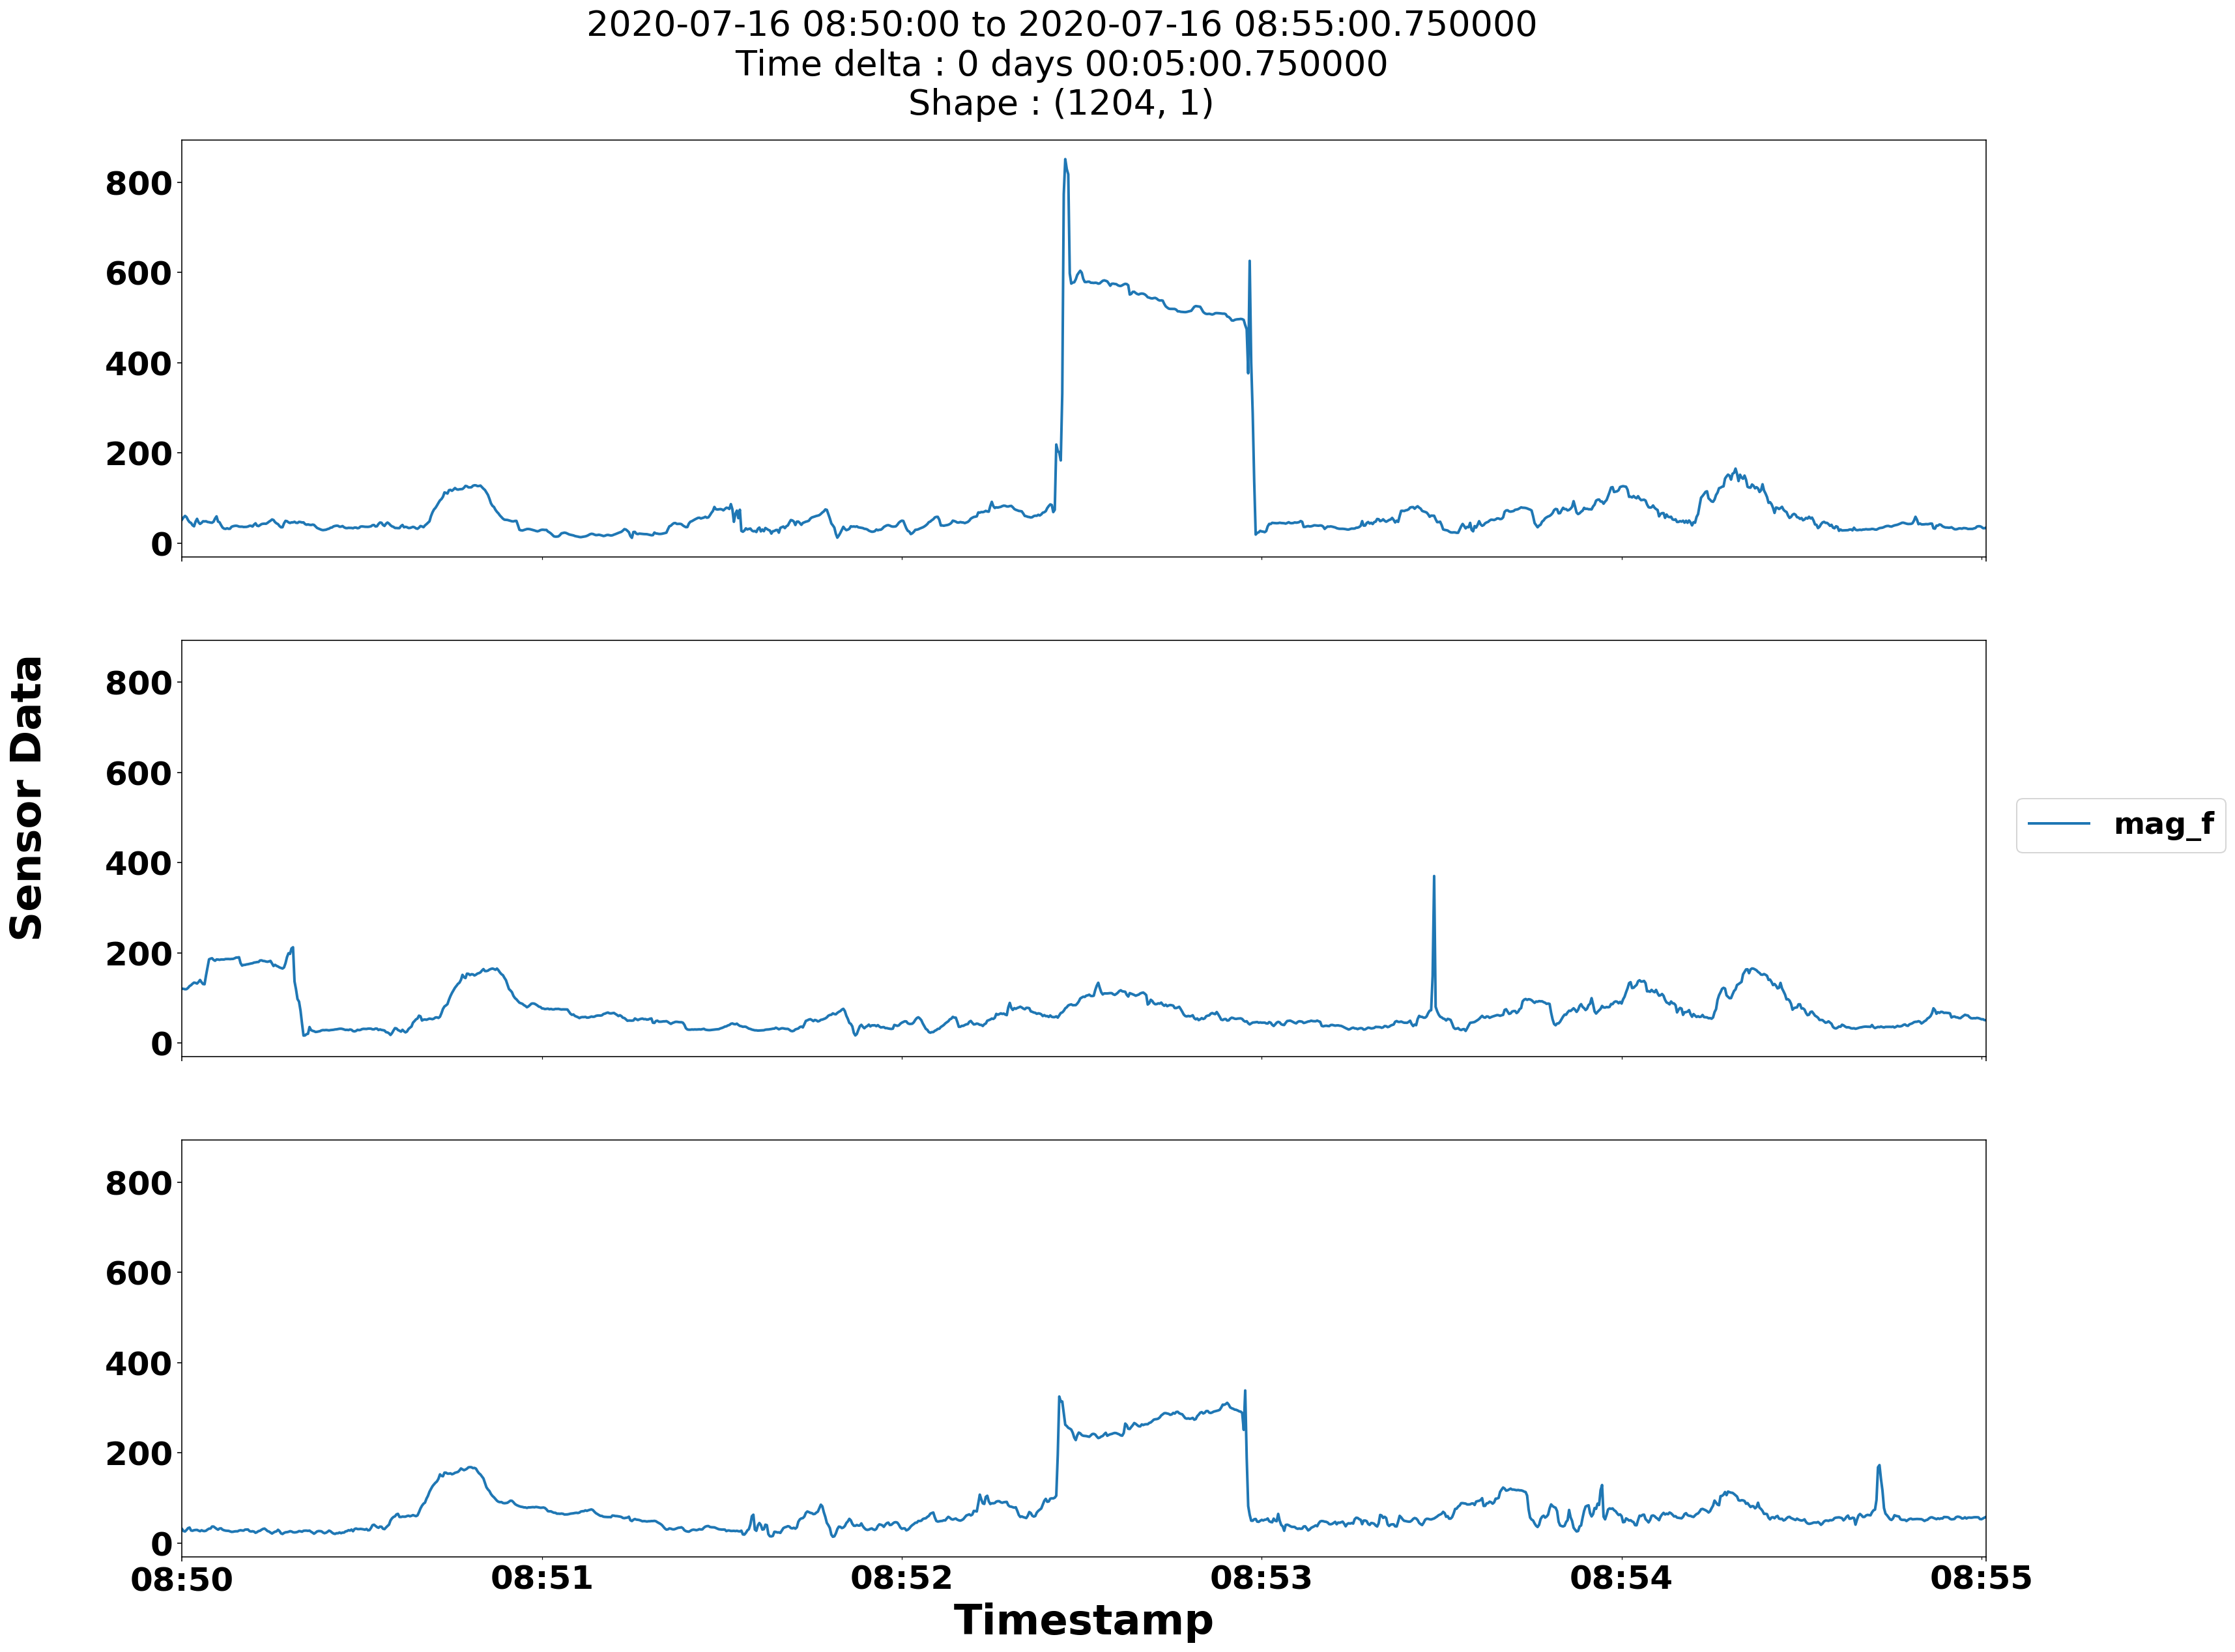

In [19]:
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20),
                             dir_name, '(stft)' + file_name + '_st_1ti2(ds)', False)

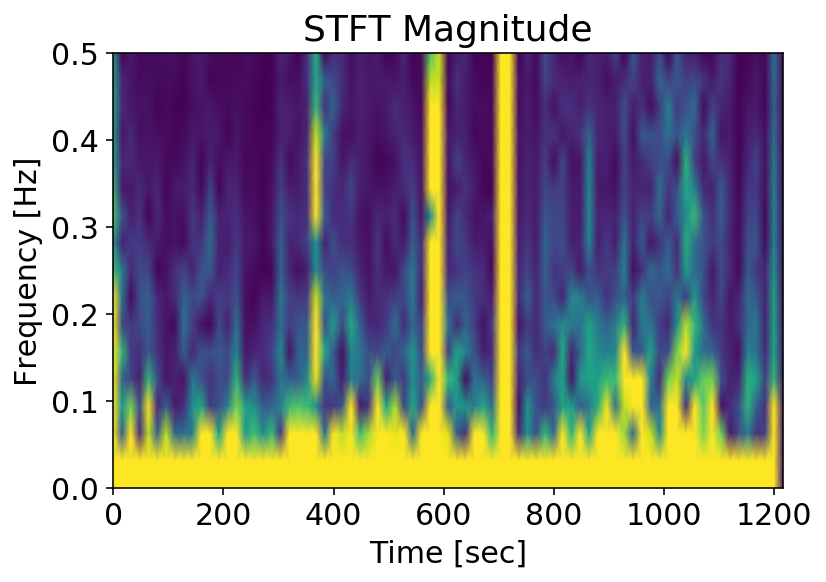

Data size :  (5782,)
Zxx size :  (17, 77)


In [20]:
f, t, Zxx = stft(data[0][time_from:time_to]['mag_f'])
stft_plot(data[0]['mag_f'], f, t, Zxx)

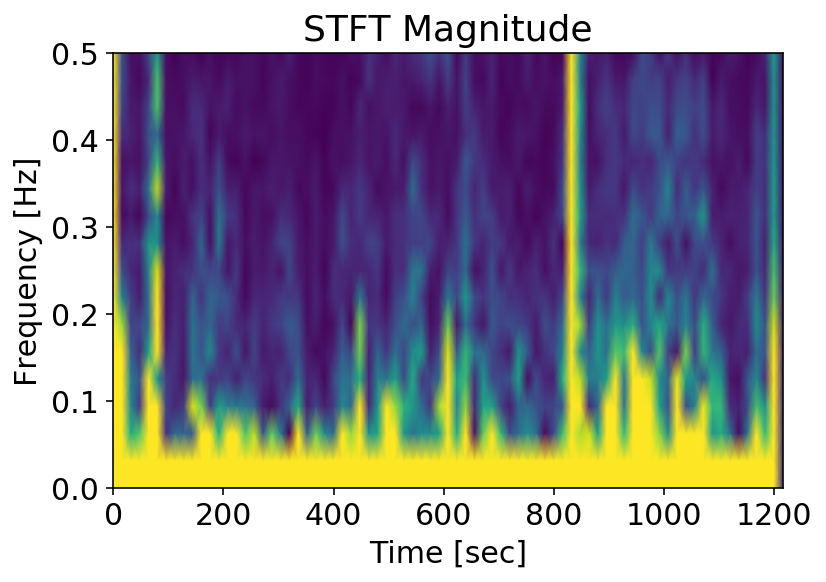

Data size :  (5779,)
Zxx size :  (17, 77)


In [21]:
f, t, Zxx = stft(data[1][time_from:time_to]['mag_f'])
stft_plot(data[1]['mag_f'], f, t, Zxx)

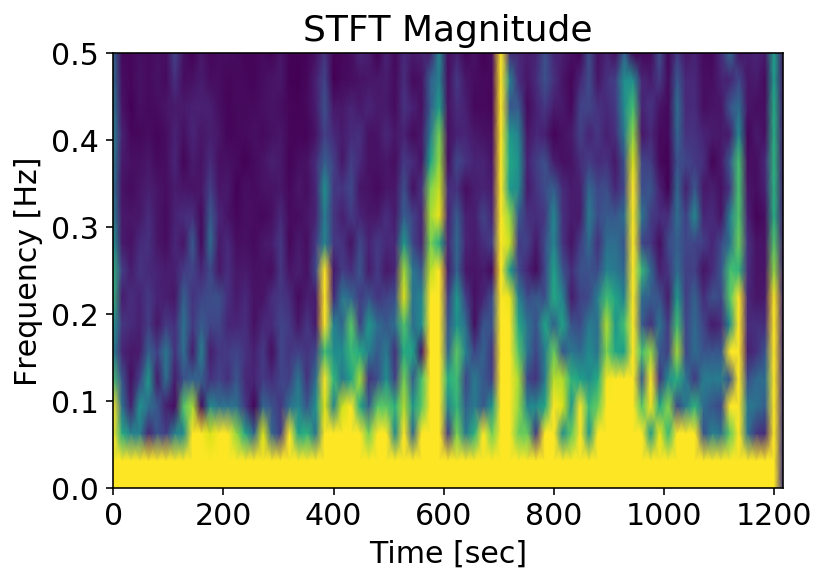

Data size :  (5785,)
Zxx size :  (17, 77)


In [22]:
f, t, Zxx = stft(data[2][time_from:time_to]['mag_f'])
stft_plot(data[2]['mag_f'], f, t, Zxx)

#### 08:55-09:00

In [23]:
data_display = ['mag_f']
time_from = "2020-07-16 08:55:00"
time_to = "2020-07-16 09:00:00"

Data 1 : 
Start :
 2020-07-16 08:55:00
End :
 2020-07-16 09:00:00.750000
Time delta :
 0 days 00:05:00.750000
Shape :
 (1204, 1) 

Data 2 : 
Start :
 2020-07-16 08:55:00
End :
 2020-07-16 09:00:00.750000
Time delta :
 0 days 00:05:00.750000
Shape :
 (1204, 1) 

Data 3 : 
Start :
 2020-07-16 08:55:00
End :
 2020-07-16 09:00:00.750000
Time delta :
 0 days 00:05:00.750000
Shape :
 (1204, 1) 



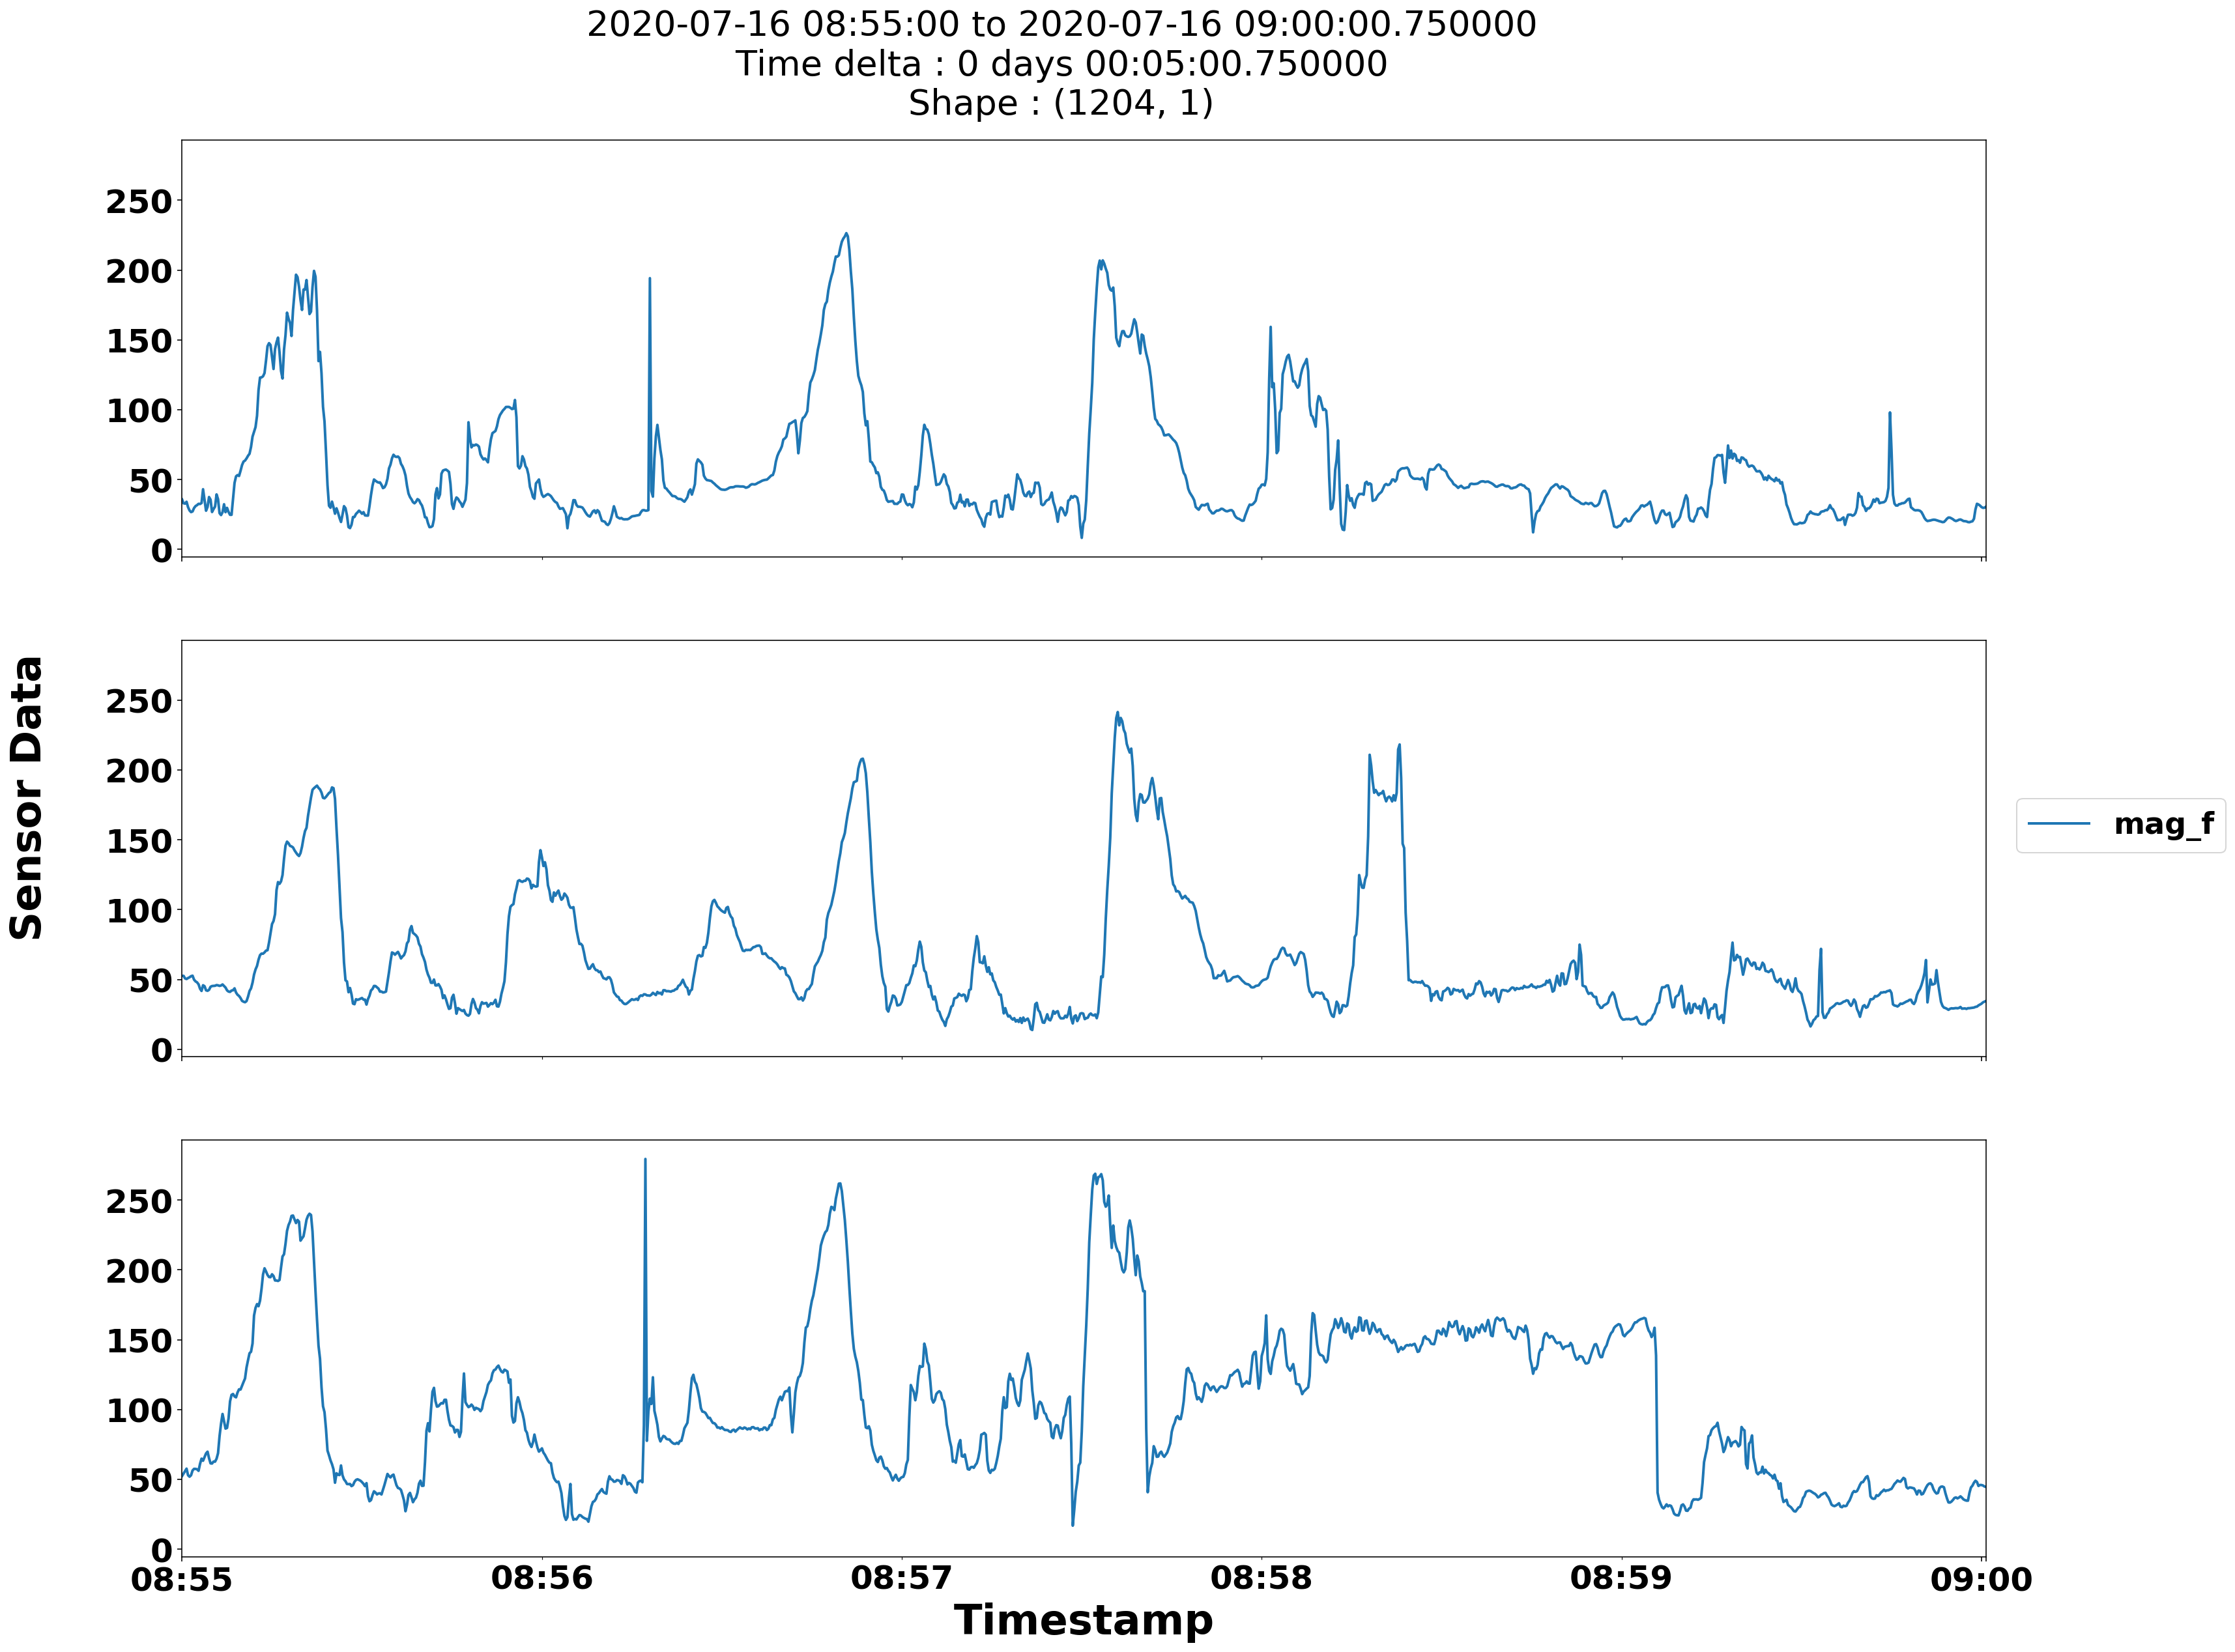

In [24]:
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20),
                             dir_name, '(stft)' + file_name + '_st_1ti3(ds)', False)

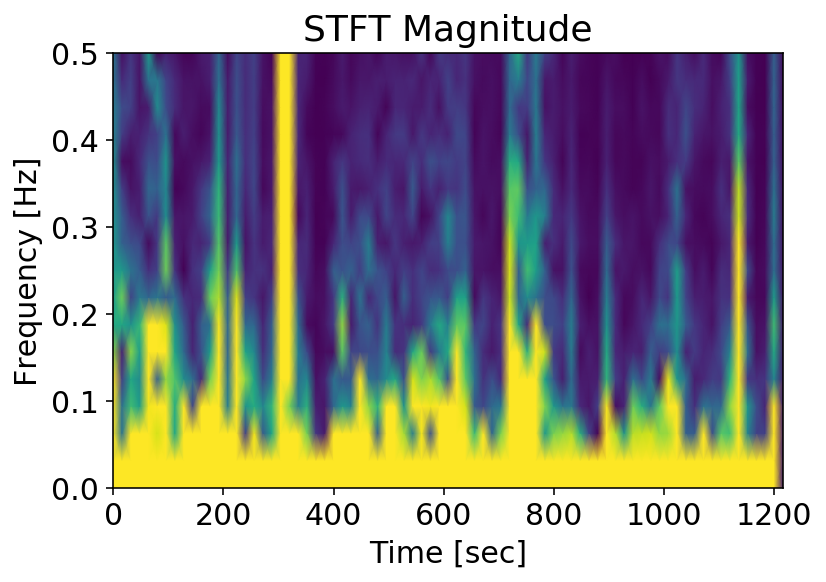

Data size :  (5782,)
Zxx size :  (17, 77)


In [25]:
f, t, Zxx = stft(data[0][time_from:time_to]['mag_f'])
stft_plot(data[0]['mag_f'], f, t, Zxx)

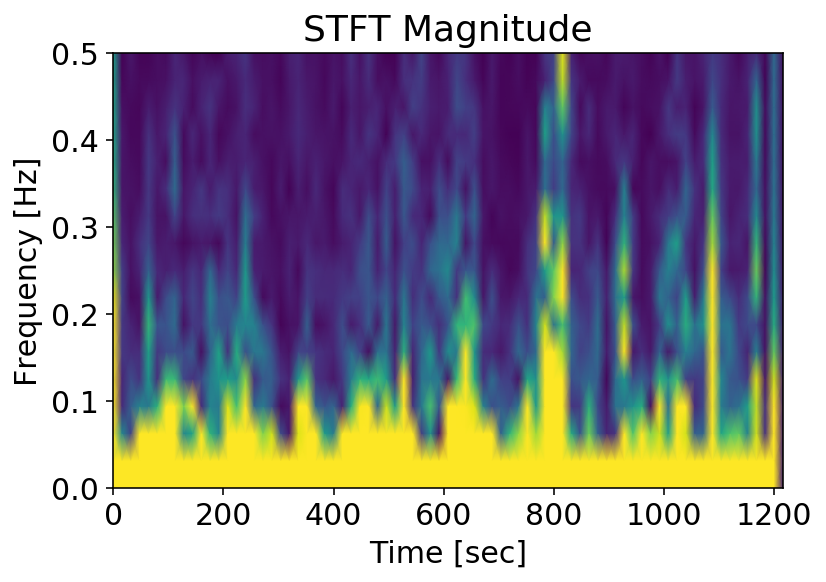

Data size :  (5779,)
Zxx size :  (17, 77)


In [26]:
f, t, Zxx = stft(data[1][time_from:time_to]['mag_f'])
stft_plot(data[1]['mag_f'], f, t, Zxx)

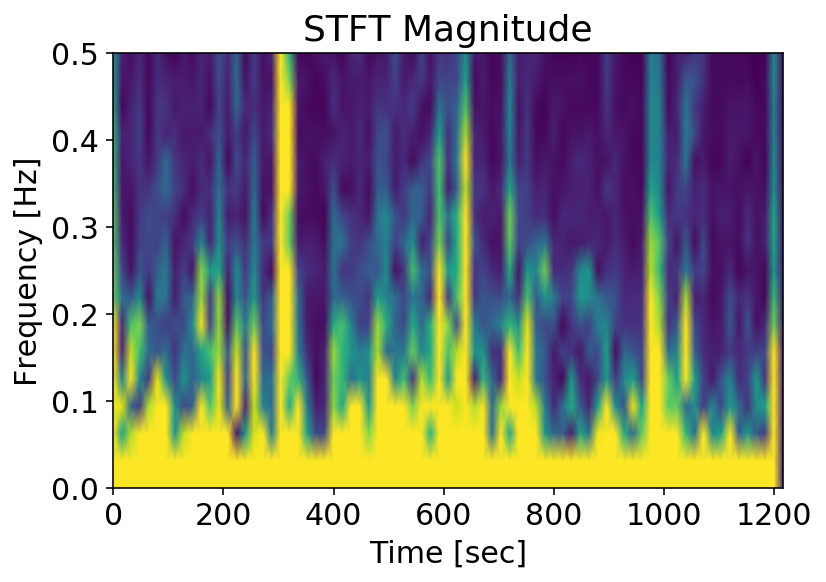

Data size :  (5785,)
Zxx size :  (17, 77)


In [27]:
f, t, Zxx = stft(data[2][time_from:time_to]['mag_f'])
stft_plot(data[2]['mag_f'], f, t, Zxx)